In [20]:
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy
from scipy.misc import derivative
import scipy.integrate as integrate
import scipy.optimize, scipy.integrate
import timeit
import math
import numpy
from sklearn.metrics import r2_score
%matplotlib inline


In [2]:
hat = fits.open('hat-p-7_b/hat-p-7_b.fits')
hat.info()

Filename: hat-p-7_b/hat-p-7_b.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      56   ()      
  1  TCE_1         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  2  TCE_2         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  3  TCE_3         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  4  TCE_4         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  5  TCE_5         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  6  TCE_6         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  7  TCE_7         1 BinTableHDU    106   71427R x 10C   [D, E, J, E, E, E, E, E, E, E]   
  8  Statistics    1 BinTableHDU    221   71427R x 50C   [D, E, J, E, E, E, E, J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   


In [3]:

PRIMARY = hat['PRIMARY']

TCE_1 = hat['TCE_1']
table_tce1 = Table.read(TCE_1) #¿se puede hacer un array de BinTablesHDU?


TCE_2 = hat['TCE_2']
table_tce2 = Table.read(TCE_2) #¿se puede hacer un array de BinTablesHDU?


TCE_3 = hat['TCE_3']
table_tce3 = Table.read(TCE_3) #¿se puede hacer un array de BinTablesHDU?


TCE_4 = hat['TCE_4']
table_tce4 = Table.read(TCE_4) #¿se puede hacer un array de BinTablesHDU?


TCE_5 = hat['TCE_5']
table_tce5 = Table.read(TCE_5) #¿se puede hacer un array de BinTablesHDU?


TCE_6 = hat['TCE_6']
table_tce6 = Table.read(TCE_6) #¿se puede hacer un array de BinTablesHDU?


TCE_7 = hat['TCE_7']
table_tce7 = Table.read(TCE_7)

table_tce1

TIME,TIMECORR,CADENCENO,PHASE,LC_INIT,LC_INIT_ERR,LC_WHITE,LC_DETREND,MODEL_INIT,MODEL_WHITE
BJD - 2454833,d,,days,dimensionless,dimensionless,dimensionless,dimensionless,dimensionless,dimensionless
float64,float32,int32,float32,float32,float32,float32,float32,float32,float32
1.3151205e+02,-1.059829e-03,1105,1.3335272e+00,-3.9541512e-05,2.5503115e-05,-3.4372607e-01,-3.9541512e-05,0.0000000e+00,1.0576324e-01
1.3153249e+02,-1.060562e-03,1106,1.3539616e+00,-2.2603195e-05,2.5496436e-05,2.9184762e-02,-2.2603195e-05,0.0000000e+00,2.0860007e-01
1.3155292e+02,-1.061294e-03,1107,1.3743960e+00,-3.5658915e-05,2.5480678e-05,-1.1320674e-01,-3.5658915e-05,0.0000000e+00,3.0092743e-01
1.3157336e+02,-1.062026e-03,1108,1.3948301e+00,-3.3626442e-05,2.5509618e-05,-4.3413952e-02,-3.3626442e-05,0.0000000e+00,3.7470224e-01
1.3159379e+02,-1.062758e-03,1109,1.4152645e+00,7.2438757e-05,2.5514733e-05,1.6507578e+00,7.2438757e-05,0.0000000e+00,4.2141774e-01
1.3161423e+02,-1.063491e-03,1110,1.4356989e+00,-1.9167643e-05,2.5512811e-05,1.9305673e-01,-1.9167643e-05,0.0000000e+00,4.3312293e-01
1.3163466e+02,-1.064223e-03,1111,1.4561331e+00,-7.2684234e-05,2.5516729e-05,-7.3616058e-01,-7.2684234e-05,0.0000000e+00,4.0229556e-01
1.3165509e+02,-1.064955e-03,1112,1.4765675e+00,-2.8484281e-05,2.5502908e-05,-1.6856681e-01,-2.8484281e-05,0.0000000e+00,3.2288116e-01


In [4]:



tce1_time = table_tce1['TIME'].data
tce1_timecorr = table_tce1['TIMECORR'].data
# tce1_cadenceno = table_tce1['CADENCENO'].data
# tce1_phase = table_tce1['PHASE'].data
tce1_lc_init = table_tce1['LC_INIT'].data
tce1_lc_init_err = table_tce1['LC_INIT_ERR'].data
tce1_lc_white = table_tce1['LC_WHITE'].data
tce1_lc_detrend = table_tce1['LC_DETREND'].data
tce1_model_init = table_tce1['MODEL_INIT'].data
tce1_model_white = table_tce1['MODEL_WHITE'].data



In [5]:
#total time of the transit



#time of the flat part of the transit


## Method 1 - Curve fitting 

In [6]:


t_data = np.delete(tce1_time[0:200], np.argwhere(np.isnan(tce1_lc_init[0:200]))[0:], axis=None) #take away the time values where we have a nan value in lc_init
lc_init_data = np.delete(tce1_lc_init[0:200], np.argwhere(np.isnan(tce1_lc_init[0:200]))[0:], axis=None) #take away the nan values in the data array of lc_init

r = np.arange(0., 1.+0.0001, 0.0001)



def lightcurve_fit(t, p:float, a:float, b:float, gamma1:float, gamma2:float, T:float, delta:float):
    
    h = 0.0 #integral and derivate step
    r = np.arange(0.01, 1., h)
    
    d = np.zeros(r.shape)
    
    omega = 2*np.pi/T
    x = a*np.cos(omega*t+delta)
    
    z_range = np.sqrt(x**2 + b**2)
    
    #INTEGRAL 1
    
    Integral_1 = 0
    
    #Function F^e*r**2
    
    P = p/r
    z0 = np.divide(z_range,r)
    
    z=z0 #I'm going to assume this because of the square root of the definition of z_range from above
#         # Reflects the information w.r.t. the y axis  
#     if z0>0:
#         z = z0
        
#     if z0<0:
#         z = -z0
    
    F_e = np.zeros(len(z))
    
    for j in range(len(z)):
        if z[j]>1+P[j]:
            F_e[j] = 1.
        elif (abs(1-P[j])<z[j] and z[j]<=1+P[j]):
            k0 = np.arccos((P[j]**2 + z[j]**2 -1)/(2*P[j]*z[j]))
            k1 = np.arccos((1-P[j]**2 + z[j]**2)/(2*z[j]))
            L0 = k0*P[j]**2
            L2 = np.sqrt((4*z[j]**2- (1+z[j]**2-P[j]**2)**2)/4) 
            F_e[j] =  (1-(L0 + k1 - L2)/np.pi)*r[j]**2
        elif (z[j]<=1-P[j]):
            F_e[j] =  (1-P[j]**2)*r[j]**2   
        elif z[j]<= P[j]-1: 
            F_e[j] = 0.

    #Limb darkening function
    
    mu = np.sqrt(1-r**2) 
    I_function = 1. - gamma1*(1-mu) - gamma2*(1-mu)**2
    
        #derivate
    derivate = np.zeros(len(r))
    derivate[0] = F_e[0]
    
    for i in range (len(r)-1):    
        derivate[i+1] = (F_e[i+1]-F_e[i])/h #Euler algorithm
        Integral_1 = Integral_1 + h*I_function[i]*derivate[i]
        
    #INTEGRAL 2
    
    Integral_2 = 0.
    
    for i in range (len(r)):
        Integral_2 = Integral_2 + h*2*r[i]*I_function[i]
        
        
    return Integral_1/Integral_2

# popt, pcov = curve_fit(lightcurve_fit, t_data, lc_init_data)

# fig1, ax1 = plt.subplots(figsize=(7,7))
# ax1.scatter(t_data, lc_init_data)
# plt.show()


### Trying again the method 1 with another approach (<https://stackoverflow.com/questions/30331984/fitting-data-with-integral-function>)

In [7]:
##ESTA ES UNA FUNCIÓN DE PRUEBA PARA VER EN QUÉ ESTÁ FALLANDO LA NUESTRA!!!

def integrand(t, args):
    w, p = args
    return math.sin(t * w)/t + p

def curve(w, p):
    res = scipy.integrate.quad(integrand, 0.0, math.pi, [w, p])
    return res[0]

vcurve = numpy.vectorize(curve, excluded=set([1]))

truexdata = numpy.asarray([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
trueydata = vcurve(truexdata, 1.0)

xdata = truexdata + 0.1 * numpy.random.randn(8)
ydata = trueydata + 0.1 * numpy.random.randn(8)

popt, pcov = scipy.optimize.curve_fit(vcurve,
                                      xdata, ydata,
                                      p0=[2.0])
print(popt)

[1.00244668]


In [23]:
#ESTA ES EL MÉTODO DE CURVEFITTING PARA EL CURVA DE LUZ

# t_data = np.delete(tce1_time[0:200], np.argwhere(np.isnan(tce1_lc_init[0:200]))[0:], axis=None) #take away the time values where we have a nan value in lc_init
# lc_init_data = np.delete(tce1_lc_init[0:200], np.argwhere(np.isnan(tce1_lc_init[0:200]))[0:], axis=None) #take away the nan values in the data array of lc_init



def L(r, P, Z): #it is already multiplied by r² as it is in the derivate into the integral
    '''
    Obstruction function
    '''
    p = P/r
    z0 = Z/r
    z = np.zeros(len(z0)) 
    for i in range(len(z0)):
        # Reflects the information w.r.t. the y axis  
        if z0[i]>0:
            z[i] = z0[i]
        if z0[i]<0:
            z[i] = -z0[i]
        
        if z[i]>1+p:
            return 0.
        elif (abs(1-p)<z[i] and z[i]<=1+p):
            k0 = np.arccos((p**2 + z[i]**2 -1)/(2*p*z[i]))
            k1 = np.arccos((1-p**2 + z[i]**2)/(2*z[i]))
            L0 = k0*p**2
            L2 = np.sqrt((4*z[i]**2- (1+z[i]**2-p**2)**2)/4) 
            return (L0 + k1 - L2)*r**2/np.pi
        elif (z[i]<=1-p):
            return p**2*r**2
        elif z[i]<= p-1: 
            return 1.*r**2

def L_noarrays(r, P, Z): #it is already multiplied by r² as it is in the derivate into the integral
    '''
    Obstruction function
    '''
    p = P/r
    z0 = Z/r
    # Reflects the information w.r.t. the y axis  
    if z0>0:
        z = z0
    if z0<0:
        z = -z0

    if z>1+p:
        return 0.
    elif (abs(1-p)<z and z<=1+p):
        k0 = np.arccos((p**2 + z**2 -1)/(2*p*z))
        k1 = np.arccos((1-p**2 + z**2)/(2*z))
        L0 = k0*p**2
        L2 = np.sqrt((4*z**2- (1+z**2-p**2)**2)/4) 
        return (L0 + k1 - L2)*r**2/np.pi
    elif (z<=1-p):
        return p**2*r**2
    elif z<= p-1: 
        return 1.*r**2


def I_function(r, gamma1, gamma2):
  '''
  Quadratic limb-darkening function
  '''
  mu = np.sqrt(1-r**2) 
  return 1. - gamma1*(1-mu) - gamma2*(1-mu)**2


def integrand_1(r, t, p, a, b, T, delta, gamma1, gamma2):
    '''
    Integrand in the numerator
    '''

    #     p = 0.1 #radius ratio
    #     b = 0.7 #impact. parameter
    #     gamma1 = 0.296 #linear limb darkening 
    #     gamma2 = 0.34 #quadratic limb darkening
    #     a = 2. #normalized semi-major axis (normalized with the star radius)
    #     T = 10. #orbital period
    #     delta = 0. #orbital phase
    omega = 2*np.pi/T #angular velocity
    x = a*np.cos(omega*t+delta)
    z = np.sqrt(x**2 + b**2)
    T1 = derivative(L, r, dx=1e-6, args=(p,z))
    T2 = I_function(r, gamma1, gamma2)
    return T1*T2


def integrand_1_noarrays(r, t, p, a, b, T, delta, gamma1, gamma2):
    '''
    Integrand in the numerator
    '''

    #     p = 0.1 #radius ratio
    #     b = 0.7 #impact. parameter
    #     gamma1 = 0.296 #linear limb darkening 
    #     gamma2 = 0.34 #quadratic limb darkening
    #     a = 2. #normalized semi-major axis (normalized with the star radius)
    #     T = 10. #orbital period
    #     delta = 0. #orbital phase
    omega = 2*np.pi/T #angular velocity
    x = a*np.cos(omega*t+delta)
    z = np.sqrt(x**2 + b**2)
    T1 = derivative(L_noarrays, r, dx=1e-6, args=(p,z))
    T2 = I_function(r, gamma1, gamma2)
    return T1*T2



def integrand_2(r, gamma1, gamma2):
    '''
    Integrand in the denominator
    '''
    return I_function(r, gamma1, gamma2)*2*r


def lc_fit(t, p, a, b, T, delta, gamma1, gamma2):
    
    # Main Loop to calculate the Flux

    Integral_1 = integrate.quad(integrand_1, 0.0001, 1., args=(t, p, a, b, T, delta, gamma1, gamma2))[0]
    Integral_2 = integrate.quad(integrand_2, 0.0001, 1., args=(gamma1, gamma2))[0]
    F= Integral_1/Integral_2
    return F

def lc_fit_noarrays(t, p, a, b, T, delta, gamma1, gamma2):
    
    # Main Loop to calculate the Flux

    Integral_1 = integrate.quad(integrand_1_noarrays, 0.0001, 1., args=(t, p, a, b, T, delta, gamma1, gamma2))[0]
    Integral_2 = integrate.quad(integrand_2, 0.0001, 1., args=(gamma1, gamma2))[0]
    F= Integral_1/Integral_2
    return F

vcurve = np.vectorize(lc_fit, excluded=set([1]))
vcurve_noarrays = np.vectorize(lc_fit_noarrays, excluded=set([1]))
truexdata = np.linspace(133.5, 136.5, 200)
trueydata = vcurve_noarrays(truexdata, 0.2, 3.0, 0.2, 2.2, 3*np.pi/2, 0.4, 0.8)

xdata = truexdata + 0.001 * np.random.randn(200)
ydata = trueydata + 0.001 * np.random.randn(200)

popt, pcov = scipy.optimize.curve_fit(lc_fit,
                                      xdata, ydata, p0 = [2.0, 2.0, 2.0,2.0, 2.0, 2.0, 2.0])

print(pcov)
print(popt)

[[inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf]
 [inf inf inf inf inf inf inf]]
[ 1.41730330e+09  2.30960829e+09  2.47508532e+08 -2.44967965e+06
  4.61536202e+08  6.05350911e+00  6.88092289e+01]


/home/juanessao2000/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


### Third try -> finding parameters by minimization or maximization

In [9]:
##ESTA ES UNA FUNCIÓN DE PRUEBA PARA VER EN QUÉ ESTÁ FALLANDO LA NUESTRA!!!


# def integrand(t, args):
#     w, p = args
#     return math.sin(t * w)/t + p

# def curve(x, p):
#     res = scipy.integrate.quad(integrand, 0.0, math.pi, [x, p])
#     return res[0]

def curve(x, a, b, c):
    return a*np.sqrt(x)+b*x*x+c/(x*x)

vcurve = np.vectorize(curve, excluded=set([1]))

truexdata = np.asarray([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
trueydata = curve(truexdata, 7.0, 8.0, 9.0)

xdata = truexdata + 0.1 * np.random.randn(7)
ydata = trueydata + 0.1 * np.random.randn(7)

popt, pcov = scipy.optimize.curve_fit(curve,
                                      xdata, ydata)
print(popt)

[7.35311774 7.98024717 5.6492302 ]


# lmfit

In [ ]:
import lmfit

t_data = 1 + np.delete(tce1_time[0:200], np.argwhere(np.isnan(tce1_lc_init[0:200]))[0:], axis=None) #take away the time values where we have a nan value in lc_init
lc_init_data = np.delete(tce1_lc_init[0:200], np.argwhere(np.isnan(tce1_lc_init[0:200]))[0:], axis=None) #take away the nan values in the data array of lc_init


def lc_resid(params, t, lc_data):
    p = params['p'].value
    a = params['a'].value
    b = params['b'].value
    T = params['T'].value
    delta = params['delta'].value
    gamma1 = params['gamma1'].value
    gamma2 = params['gamma2'].value
    
    Integral_1 = np.zeros(len(t))
    Integral_2 = np.zeros(len(t))
    F = np.zeros(len(t))
    
    for i in range(len(t)):
        Integral_1[i] = integrate.quad(integrand_1, 0.0001, 1., args=(t, p, a, b, T, delta, gamma1, gamma2))[0]
        Integral_2[i] = integrate.quad(integrand_2, 0.0001, 1., args=(gamma1, gamma2))[0]
        F[i]= 1. - Integral_1[i]/Integral_2[i]
    
    return F - lc_data

params = lmfit.Parameters()
params.add(name ='p', value = 1.0)
params.add(name ='a', value = 1.0)
params.add(name ='b', value = 1.0)
params.add(name ='T', value = 1.0)
params.add(name ='delta', value = 1.0)
params.add(name ='gamma1', value = 1.0)
params.add(name ='gamma2', value = 1.0)

fit = lmfit.minimize(lc_resid, params, args =(t_data, lc_init_data))
p = 1.45921258
a = 1.10078824
b = 0.44740415
T = 0.99944628
delta = 1.11166236
gamma1 = 79.0120679
gamma2 = -53.5736054

v_lc = np.vectorize(lc_fit_noarrays, excluded=set([1]))

y_model = v_lc(t_data, p, a, b, T, delta, gamma1, gamma2)
y_model
# R_squared = r2_score(lc_init_data, y_model)

# print(lmfit.report_fit(fit))
# print(R_squared)

## Method 2  - Unique solution for the parameters -> reference [3] 

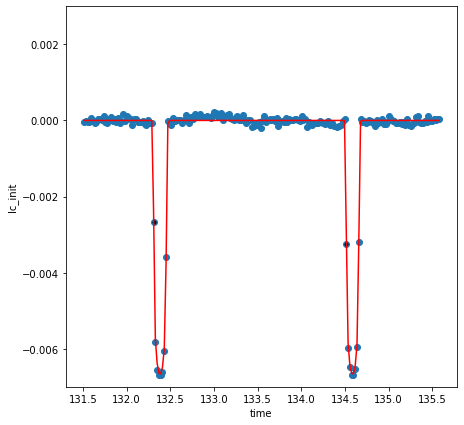

[[ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [147]
 [148]
 [149]
 [150]
 [151]
 [152]
 [153]
 [154]]
[[43]]
[0.99993616 0.9973355  0.99417984 0.9934325  0.9933229  0.99331015
 0.9933969  0.9939507  0.9964151 ]


In [11]:
from scipy.ndimage import minimum as min
from astropy import constants as const


fig, ax = plt.subplots(figsize=(7,7))

ax.scatter(tce1_time[0:200], tce1_lc_init[0:200])
ax.plot((tce1_time[39],tce1_time[147]), (tce1_lc_init[39],tce1_lc_init[147]), '.k')
#IMPORTANT NOTE: for the range [0:200] there are Nan values, which mess both with curve fitting or 
ax.plot(tce1_time[0:200], tce1_model_init[0:200], '-r')
ax.set_ylim(-0.007,0.003)
ax.set_xlabel('time')
ax.set_ylabel('lc_init')


plt.show()


F = tce1_lc_init[0:100]+1 #We sum to the flux of light a unit so that we obtain the normalized flux respect to the flux without transit

F_t = min(F) #minimum light flux value due to the transit (THEN WE WILL NEED TO FIND THE ERROR
F_t_error = tce1_lc_init_err[43] # the index of the minimum is 43
F_no_t = 1.0 #value of the flux with the mean centered in one after moving it from zero

Delta_F = (F_no_t - F_t)/F_t


under_values = np.argwhere((tce1_lc_init[0:200]+1)<0.998) #flux values that are under 0.998
print(under_values)
print(np.argwhere(F == min(F)))
print(F[38:47])

In [12]:
from scipy import stats as sts
from scipy.optimize import curve_fit

#tT

def linear_fit(x, a:float, b:float):
    return a*x+b

def intersection(y:float, a:float, b:float)->float:
    return (y-b)/a

# if __name__ == "__main__": #to get use to this order

    #left straight line

mean_1 = np.mean(F[0:38])
std_dev_1 = np.std(F[0:38])

mean_max_std1 = mean_1 + std_dev_1
mean_min_std1 = mean_1 - std_dev_1  

linear_y1 = np.array([F[38], F[39], F[40]])
linear_x1 = np.array([t_data[38], t_data[39], t_data[40]])

popt_1, pcov_1 = curve_fit(linear_fit, linear_x1, linear_y1)
a1 = popt_1[0]
b1 = popt_1[1]

tT_left = intersection(mean_1, a1, b1)
tT_sigma_min_left = intersection(mean_max_std1, a1, b1)
tT_sigma_max_left = intersection(mean_min_std1, a1, b1)
tT_left_error = tT_left - tT_sigma_min_left

x1 = np.linspace(132.25, 132.3, 100)
y1 = linear_fit(x1, a1, b1) #!!!!!No estoy logrando graficar esta recta sobre el plot de los datos junto con el model_init del archivo

    #right straight line

mean_2 = np.mean(F[47:100])
std_dev_2 = np.std(F[47:100])

mean_max_std2 = mean_2 + std_dev_2
mean_min_std2 = mean_2 - std_dev_2  

linear_y2 = np.array([F[45], F[46], F[47]])
linear_x2 = np.array([t_data[45], t_data[46], t_data[47]])

popt_2, pcov_2 = curve_fit(linear_fit, linear_x2, linear_y2)
a2 = popt_2[0]
b2 = popt_2[1]

tT_right = intersection(mean_2, a2, b2)
tT_sigma_max_right = intersection(mean_max_std2, a2, b2)
tT_sigma_min_right = intersection(mean_min_std2, a2, b2)
tT_right_error = tT_right - tT_sigma_min_right

x2 = np.linspace(132.4, 132.5, 100)
y2 = linear_fit(x2, a2, b2) #!!!!No estoy logrando graficar esta recta sobre el plot de los datos junto con el model_init del archivo

    #Then tT is

tT = tT_right - tT_left
tT_error = tT_right_error + tT_left_error

print(f'tT_left = {tT_left:.4f} +- {tT_left_error:.4f} ')
print(f'tT_right = {tT_right:.4f} +- {tT_right_error:.4f}\n')
print('The transit total time is: \n')
print(f'tT = ({tT:.3f} +- {tT_error:.3f}) years \n')

#Delta_F error 
    #I am assuming the standard deviation of the left flat part of the figure as the error of F_no_t

D = std_dev_1 + F_t_error
Delta_F_error = Delta_F*np.sqrt((D/(F_no_t - F_t))**2+(F_t_error/F_t)**2)

print('And the Delta_F is: \n')

print(f'Delta_F = ({Delta_F:.5f} +- {Delta_F_error:.5f})')

tT_left = 133.2888 +- 0.0004 
tT_right = 133.4741 +- 0.0006

The transit total time is: 

tT = (0.185 +- 0.001) years 

And the Delta_F is: 

Delta_F = (0.00673 +- 0.00009)


In [13]:
#tf

flat_part_F = np.array([F[41],F[42], F[43], F[44]])
flat_mean = np.mean(flat_part_F)
flat_std_dev = np.std(flat_part_F)

flat_mean_max_std = flat_mean + flat_std_dev
flat_mean_min_std = flat_mean - flat_std_dev  

tF_left = intersection(flat_mean, a1, b1)
tF_sigma_min_left = intersection(flat_mean_max_std, a1, b1)
tF_sigma_max_left = intersection(flat_mean_min_std, a1, b1)
tF_left_error = tF_left - tF_sigma_min_left

tF_right = intersection(flat_mean, a2, b2)
tF_sigma_max_right = intersection(flat_mean_max_std, a2, b2)
tF_sigma_min_right = intersection(flat_mean_min_std, a2, b2)
tF_right_error = tF_right - tF_sigma_min_right

    #Then tT is

tF = tF_right - tF_left
tF_error = tF_right_error + tF_left_error

print(f'tF_left = {tF_left:.4f} +- {tF_left_error:.4f} ')
print(f'tF_right = {tF_right:.4f} +- {tF_right_error:.4f}\n')
print('The flat part time is: \n')
print(f'tF= ({tF:.4f} +- {tF_error:.4f}) years')


tF_left = 133.3359 +- 0.0004 
tF_right = 133.4289 +- 0.0003

The flat part time is: 

tF= (0.0930 +- 0.0007) years


In [14]:
#With this values it is going to be stablished the period of the transit

under_values = np.argwhere((tce1_lc_init[0:200]+1)<0.998)
print(under_values)

[[ 39]
 [ 40]
 [ 41]
 [ 42]
 [ 43]
 [ 44]
 [ 45]
 [ 46]
 [147]
 [148]
 [149]
 [150]
 [151]
 [152]
 [153]
 [154]]


In [15]:
#T

T = tce1_time[147] - tce1_time[39]
# T = 2*T #?????????????????
T_error = tce1_timecorr[147] + tce1_timecorr[39]
# T_error = T_error*2 #?????????????????
print(f'T = ({T:.3f} +- {np.abs(T_error):.3f}) years')

T = (2.207 +- 0.002) years


### Planet-star ratio

$p \equiv \frac{R_p}{R_*} = \sqrt{\Delta F}$

### Impact parameter

$b \equiv \frac{a'}{R_*}cosi = \left[\frac{\left(1-\sqrt{\Delta F}\right)^2-\frac{sin^2\frac{t_F \pi}{P}}{sin^2\frac{t_T \pi}{P}}\left(1+\sqrt{\Delta F}\right)^2}{1-\frac{sin^2\frac{t_F \pi}{P}}{sin^2\frac{t_T \pi}{P}}}\right]$

where $a'$ is the value of the semi axis in a units system

### Semi-axis-Star ratio

$a \equiv \frac{a'}{R_*} = \left[\frac{(1+\sqrt{\Delta F})^2-b^2(1-sin^2\frac{t_T\pi}{P})}{sin^2\frac{t_T\pi}{P}}\right]$

### Star-sun density ratio

$\frac{\rho_*}{\rho_\odot} \equiv \frac{M_*/M_\odot}{(R_*/R_\odot)^3} = \left[\frac{4\pi^2}{P^2 G}\right]\left[\frac{(1+\sqrt{\Delta F})^2-b^2(1-sin^2\frac{t_T\pi}{P})}{sin^2\frac{t_T\pi}{P}}\right]$

In [16]:
# planet-star ratio
p = np.sqrt(Delta_F)
    
    #planet-star ratio error
p_error = p*(1./2.)*(Delta_F_error/Delta_F)

#impact parameter
b = np.sqrt(((1.-np.sqrt(Delta_F)**2)-((np.sin(tF*np.pi/T)**2)/(np.sin(tT*np.pi/T)**2))*(1.+np.sqrt(Delta_F))**2)/(1.-(np.sin(tF*np.pi/T)**2)/(np.sin(tT*np.pi/T)**2)))
    
    #Impact parameter error
A = np.sin(tF*np.pi/T)**2
C = np.sin(tT*np.pi/T)**2

D = ((1-p)**2)*2*(p_error/(1-p))
P = ((1+p)**2)*2*(p_error/(1+p)) #This error is goint to be used to find a_error and density_ratio_error

B = (tF/T)*np.sqrt((tF_error/tF)**2 + (T_error/T)**2)
B = np.sin(tF*np.pi/T)*np.pi*B
B = A*2*(B/np.sin(tF*np.pi/T))

K = (tT/T)*np.sqrt((tT_error/tF)**2 + (T_error/T)**2)
K = np.sin(tT*np.pi/T)*np.pi*K
L = C*2*(K/np.sin(tT*np.pi/T)) #I created a new variable L because this error is going to be used in the other two propagation o errors

M = (A/C)*np.sqrt((B/A)**2 + (L/C)**2) #This error appears in the last calculus of b_error, that's the reason why I created another variable for it

B = (A/C)*((1+p)**2)*np.sqrt((M*C/A)**2 + (P/((1+p)**2)**2))                         
D = B+D

b_error = b*np.sqrt((D**2/(((1-p)**2)-(A/C)*((1+p)**2)))**2 + (M*C/A)**2)

#Semi-axis-Star ratio
a = np.sqrt(((1.+np.sqrt(Delta_F)**2-(b**2)*(1.-np.sin(tT*np.pi/T)**2)))/(np.sin(tT*np.pi/T)**2))

    #Semi-axis-Star ratio error
B = (b**2)*2*(b_error/b)
B = (b**2)*(1-C)*np.sqrt((B/b**2)**2 + (L/(1-C))**2)
B = P + B
a_error = a*np.sqrt((B/(((1+p)**2)-(b**2)*(1-C)))**2 + (L/C)**2)
    
#star-sun density ratio
density_ratio = (4.*(np.pi**2)/(const.G*T**2))*np.sqrt(((1.+np.sqrt(Delta_F)**2-(b**2)*(1.-np.sin(tT*np.pi/T)**2)))/(np.sin(tT*np.pi/T)**2))**2

    #Star-sun density ratio error
density_ratio_error = (4.*(np.pi**2)/(const.G*T**2))*a_error
    
print(f'p = ({p:.4f} +- {p_error:.4f}) \nb = ({b:.3f} +- {b_error:.3f} ) \na = ({a:.2f} +- {a_error:.2f}) \ndensity_ratio = ({density_ratio:.2e} +- {density_ratio_error: .0e}')


p = (0.0821 +- 0.0005) 
b = (0.965 +- 0.006 ) 
a = (1.43 +- 0.06) 
density_ratio = (2.47e+11 kg s2 / m3 +-  7e+09 kg s2 / m3


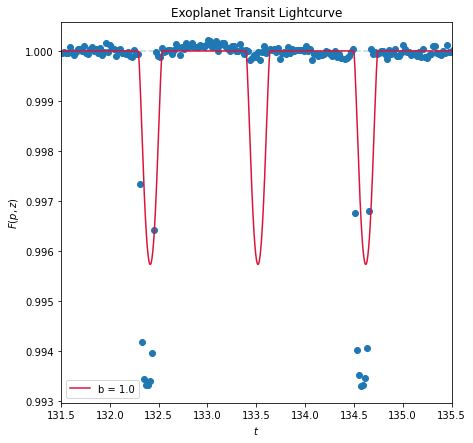

tiempo de cómputo: 0.003145561000565067


In [17]:
def L(r, P, Z): #it is already multiplied by r² as it is in the derivate into the integral
  '''
  Obstruction function
  '''
  p = P/r
  z0 = Z/r
  
  # Reflects the information w.r.t. the y axis  
  if z0>0:
    z = z0
  if z0<0:
    z = -z0
    
  if z>1+p:
    return 0.
  elif (abs(1-p)<z and z<=1+p):
    k0 = np.arccos((p**2 + z**2 -1)/(2*p*z))
    k1 = np.arccos((1-p**2 + z**2)/(2*z))
    L0 = k0*p**2
    L2 = np.sqrt((4*z**2- (1+z**2-p**2)**2)/4) 
    return (L0 + k1 - L2)*r**2/np.pi
  elif (z<=1-p):
    return p**2*r**2
  elif z<= p-1: 
    return 1.*r**2


def I_function(r):
  '''
  Quadratic limb-darkening function
  '''
  mu = np.sqrt(1-r**2) 
  return 1. - gamma1*(1-mu) - gamma2*(1-mu)**2


def integrand_1(r, p, z):
  '''
  Integrand in the numerator
  '''
  T1 = derivative(L, r, dx=1e-6, args=(p,z))
  T2 = I_function(r)
  return T1*T2


def integrand_2(r):
  '''
  Integrand in the denominator
  '''
  return I_function(r)*2*r



# Parameters for the model
gamma1 = 0.2 #linear limb darkening 
gamma2 = 0.2 #quadratic limb darkening
delta = 3*np.pi/2 #orbital phase
omega = 2*np.pi/T #angular velocity


Rp = 1.51*0.102719 #convertion factor from jovian radius to solar radius
Rp_error = 0.21*0.102719

Rs =  2 #in solar radius
Rs_error = 0.28


# Grid definition
N = 1000
t = np.linspace(131.5,135.5,N)
x = a*np.cos(omega*t+delta)

z_range = np.sqrt(x**2 + b**2)


# Flux

F2 = np.zeros(N)


# Main Loop to calculate the Flux

for i in range(N):
  Integral_1 = integrate.quad(integrand_1, 0.0001, 1., args=(p,z_range[i]))[0]
  Integral_2 = integrate.quad(integrand_2, 0.0001, 1.)[0]
  F2[i] = 1. - Integral_1/Integral_2

fig2, ax2 = plt.subplots(figsize=(7,7))

start = timeit.timeit()
# Plot the Flux as function of time
ax2.scatter(tce1_time[0:230], tce1_lc_init[0:230]+1)
ax2.plot(t, F2,color='crimson', label=f'b = {b:.1f}')
ax2.hlines(1., t[0], t[-1],linestyle='dashed', alpha=0.3)
ax2.set_xlabel(r'$t$')
ax2.set_ylabel(r'$F(p,z)$')
ax2.set_xlim((131.5,135.5))
ax2.set_title('Exoplanet Transit Lightcurve')
ax2.legend()
plt.show()

end = timeit.timeit()
print(f'tiempo de cómputo: {end - start}')



### Valores obtenidos de la base de datos de exoplanetas

In [18]:
Rp = 1.51*0.102719 #convertion factor from jovian radius to solar radius
Rp_error = 0.21*0.102719

Rs =  2 #in solar radius
Rs_error = 0.28

p_data_base = Rp/Rs
p_data_base_error = p_data_base*np.sqrt((Rp_error/Rp)**2+(Rs_error/Rs))

a_not =  0.037*215.032 #convertion factor from AU to solar radius
a_not_error = 0

a_data_base = a_not/Rs
a_data_base_error = a_data_base*np.sqrt((a_not_error/a_not)**2+(Rs_error/Rs)**2)

print(f'from the data base we have \np = {p_data_base:.2f} +- {p_data_base_error:.2f}')
print(f'a = {a_data_base:.1f}+-{a_data_base_error:.1f}')

from the data base we have 
p = 0.08 +- 0.03
a = 4.0+-0.6


In [19]:
def integrand(t, args):
    w, p = args
    return math.sin(t * w)/t + p

def curve(w, p):
    res = scipy.integrate.quad(integrand, 0.0, math.pi, [w, p])
    return res[0]

vcurve = numpy.vectorize(curve, excluded=set([1]))

truexdata = numpy.asarray([0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0])
trueydata = vcurve(truexdata, 1.0)

xdata = truexdata + 0.1 * numpy.random.randn(8)
ydata = trueydata + 0.1 * numpy.random.randn(8)

popt, pcov = scipy.optimize.curve_fit(vcurve,
                                      xdata, ydata,
                                      p0=[2.0])
print(popt)

[0.98763059]


---
## References


1. K. Mandel and E. Agol. *Analytic Lightcurves for Planetary Transit Searches*. [astro-ph:0210099](https://arxiv.org/pdf/astro-ph/0210099.pdf).
2. S. E. Thompson 2016, Data Validation Time Series
File: Description of the File Format and Content, KSCI-19079-001.
3. S. Seager and G. Mallén-Ornelas. *On the Unique Solution of Planet and Star Parameters from an Extrasolar Planet Transit Light Curve*. [astro-ph:0206228](https://arxiv.org/pdf/astro-ph/0206228.pdf)
4. Numpy
5. Scipy
6. Matplotlib